In [1]:
from __future__ import print_function
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten, MaxPooling2D, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model, model_from_json, Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import Precision, Recall
from keras.utils import to_categorical
import os, numpy as np
from skimage.transform import resize

from skimage.transform import rotate, AffineTransform, warp
from skimage.util import random_noise
from skimage.filters import gaussian
from PIL import Image 
import cv2

import matplotlib.pyplot as plt
import random
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
X_test = np.load("drive/My Drive/CV/testx.npy")
Y_test = np.load("drive/My Drive/CV/testy.npy")

In [4]:
input_shape = (128, 128)
print(Y_test.shape)
Y_test = to_categorical(np.array(Y_test, dtype='int32'), 3)
print(Y_test.shape)

(587,)
(587, 3)


In [5]:
X_t_t = []
for i in range(len(X_test)):
    if not (i%100):
        print(i)
    t = resize(X_test[i], input_shape)
    t = cv2.normalize(t, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_8U)
    X_t_t.append(t)

0
100
200
300
400
500


In [0]:
# X_train = np.array(X_train)
X_test = np.array(X_t_t)

In [0]:
def save_model(model, name):
    # serialize model to JSON
    model_json = model.to_json()
    with open("model_" + name + ".json", "w") as json_file:
        json_file.write(model_json)
    model.save_weights("model_" + name + ".h5")
    print("Saved " + name + " to disk")

In [0]:
def load_model(json_file_name, weights_file_name):
    json_file = open(json_file_name, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights(weights_file_name)
    print("Loaded model from disk")
    return loaded_model

In [0]:
def get_params(model, X, Y):
    scores = model.evaluate(X, Y, verbose=0)
    for i in range(len(scores)):
        print("%s: %.2f%%" % (model.metrics_names[i], scores[i]*100))
    
    m = (2 * scores[1] * scores[2]) / (scores[1] + scores[2])
    print("%s: %.2f%%" % ("F1 Score", m*100))
    Y_P = model.predict(X)
    matrix = confusion_matrix(Y.argmax(axis=1), Y_P.argmax(axis=1))
    print("Confusion Matrix is:")
    print(matrix)

In [10]:
loaded_model = load_model("drive/My Drive/CV/model_final_resnet_20_200.json", "drive/My Drive/CV/model_final_resnet_20_200.h5")
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall()])
loaded_model.summary()

Loaded model from disk
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 128, 128, 16) 64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 128, 128, 16) 0           batch_normalization_1[0][0]      
_____________________________________________________________________

In [11]:
print(Y_test[0], X_test.shape)

[1. 0. 0.] (587, 128, 128, 3)


In [12]:
get_params(loaded_model, X_test, Y_test)

loss: 26.03%
accuracy: 95.74%
precision_1: 95.74%
recall_1: 95.74%
F1 Score: 95.74%
Confusion Matrix is:
[[ 46   0   3]
 [  2 259   8]
 [  1  11 257]]


In [13]:
loaded_model = load_model("drive/My Drive/CV/model_final_resnet_20_200.json", "drive/My Drive/CV/model_final_resnet_20_200.h5")
loaded_model.summary()

Loaded model from disk
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 128, 128, 16) 64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 128, 128, 16) 0           batch_normalization_1[0][0]      
_____________________________________________________________________

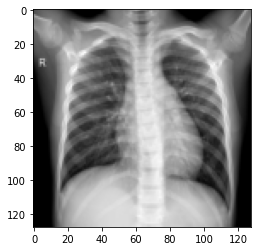

In [14]:
index = random.randint(0,len(X_test)-1)
img = X_test[index]
plt.imshow(img)

In [16]:
model = loaded_model
y_pred = model.predict(img[np.newaxis,...])
class_idxs_sorted = np.argsort(y_pred.flatten())[::-1]
print("Predicted label of the image is " + str(np.argmax(y_pred,axis=1)[0]))

Predicted label of the image is 1
